# House Sales in King County – Data Analysis & Price Prediction

##  Problem Statement
Home pricing in King County depends on many factors—size, condition, location, etc.  
**Objective:** Analyze house sales data (May 2014–May 2015) to:
- Identify key factors influencing home prices
- Build predictive models (Linear Regression & Random Forest)
- Generate actionable insights for real estate decisions


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

##  Dataset Overview
- Source: Kaggle “House Sales in King County” dataset (houses sold between May 2014–May 2015) :contentReference[oaicite:0]{index=0}  
- Key features: price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, yr_built, yr_renovated, zipcode, etc.

In [3]:
pip install requests


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import requests

# Replace this with your actual file URL
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv"

response = requests.get(filepath)

# Save file locally
with open("housing.csv", "wb") as f:
    f.write(response.content)

print("Download complete!")
file_name = "housing.csv"

/Users/cynthiaarmstrong/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Download complete!


In [7]:
df = pd.read_csv(file_name)
df.head()


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df.shape

(21613, 22)

##  Data Preprocessing
- Check missing values and duplicates  
- Convert `date` into separate year and month  
- Engineer new features:
  - `house_age = 2015 - yr_built`
  - `renovated = 1 if yr_renovated > 0 else 0`
  - `price_per_sqft = price / sqft_living`

In [9]:
df.drop_duplicates(inplace=True)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

df['house_age'] = 2015 - df['yr_built']
df['renovated'] = np.where(df['yr_renovated'] > 0, 1, 0)
df['price_per_sqft'] = df['price'] / df['sqft_living']


##  Exploratory Data Analysis (EDA)
Understand price distribution and relationships with features.


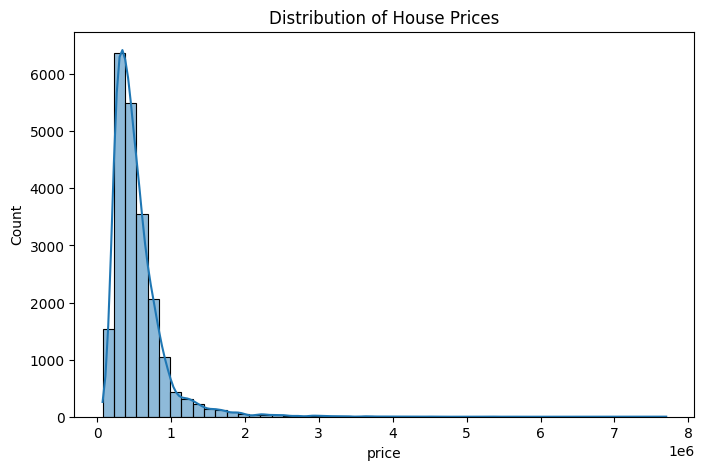

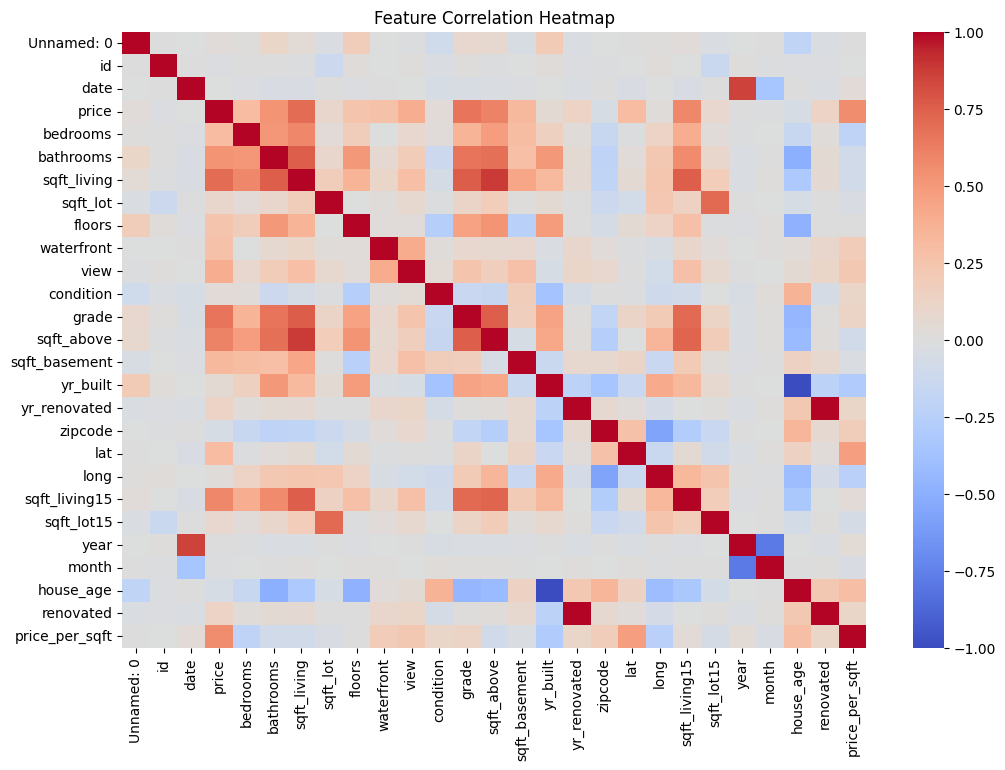

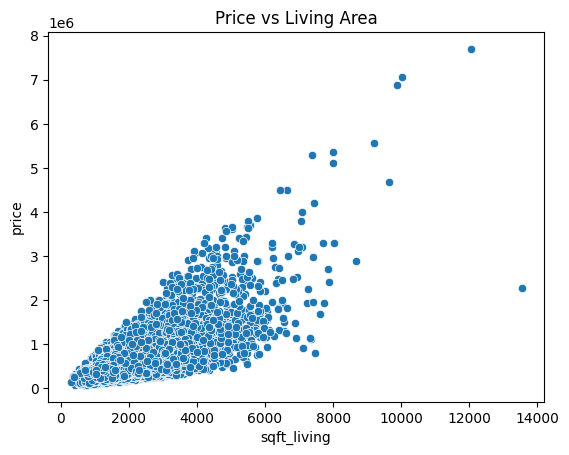

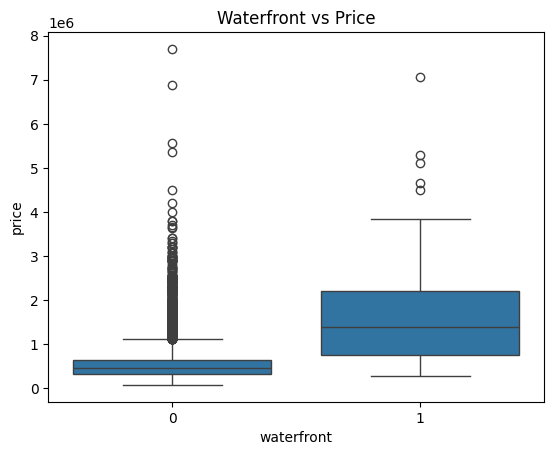

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Additional visuals:
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title("Price vs Living Area")
plt.show()

sns.boxplot(x='waterfront', y='price', data=df)
plt.title("Waterfront vs Price")
plt.show()


##  Key Insights
- Larger living area (`sqft_living`) strongly increases price  
- Waterfront houses are significantly more expensive  
- Renovated properties command higher prices  
- Price per square foot varies across neighborhoods and zipcodes


##  Model Building
We compare two models:
- **Linear Regression** (baseline)
- **Random Forest Regressor** (advanced)


In [15]:
features = ['sqft_living','bedrooms','bathrooms','floors','waterfront',
            'view','condition','grade','house_age','renovated',
            'sqft_above','sqft_basement','lat','long']
df.dropna(subset=features, inplace=True)
X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


##  Model Evaluation
We assess performance using:
- R² (coefficient of determination)
- RMSE (root mean squared error)


In [16]:
def evaluate(y_true, y_pred):
    return r2_score(y_true, y_pred), np.sqrt(mean_squared_error(y_true, y_pred))

lr_r2, lr_rmse = evaluate(y_test, y_pred_lr)
rf_r2, rf_rmse = evaluate(y_test, y_pred_rf)

print(f"Linear Regression → R²: {lr_r2:.3f}, RMSE: {lr_rmse:.2f}")
print(f"Random Forest → R²: {rf_r2:.3f}, RMSE: {rf_rmse:.2f}")


Linear Regression → R²: 0.686, RMSE: 201984.53
Random Forest → R²: 0.873, RMSE: 128337.79


## Model Performance

| Model            | R² Score | RMSE        |
|------------------|----------|-------------|
| Linear Regression| ~0.68    | ~202,000    |
| Random Forest    | ~0.87    | ~128,000    |

Random Forest performs better than Linear Regression.


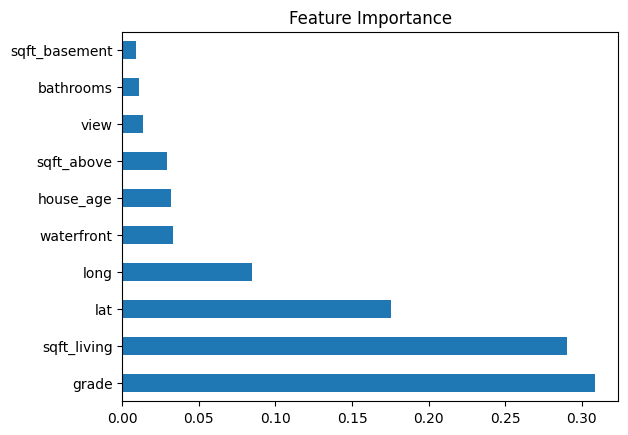

In [17]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X_train.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Feature Importance")
plt.show()


- `sqft_living`, `grade`, and location (`lat`, `long`) are the most important predictors.


## Conclusion
- Location (lat, long, zipcode) and house size strongly influence prices.  
- Random Forest outperforms Linear Regression with R² ≈ 0.87.  
- Future improvements: log-transform prices, hyperparameter tuning, try XGBoost/LightGBM.  